# Task 3

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 4

## For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Median value of owner-occupied homes')

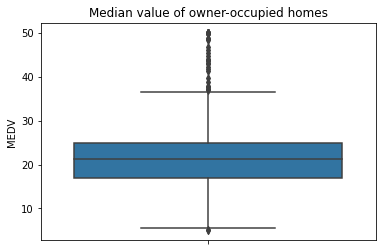

In [15]:

graph1 = sns.boxplot(y = "MEDV", data = boston_df)
graph1.set_title('Median value of owner-occupied homes')

## Provide a  histogram for the Charles river variable

Text(0.5, 0.98, 'Histogram for the Charles river variable')

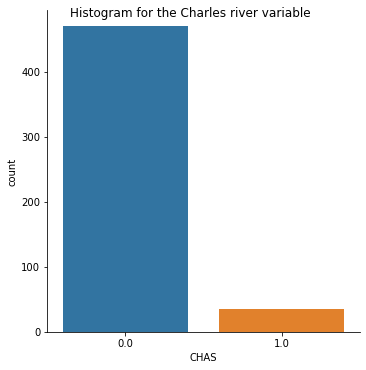

In [16]:
#CHAS - CR dummy variable (1 if tract bounds river, 0 otherwise)
graph2 = sns.catplot(x = 'CHAS', kind = 'count', data = boston_df)
graph2.fig.suptitle('Histogram for the Charles river variable')

## Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0.5, 1.0, 'MEDV variable vs AGE variable')

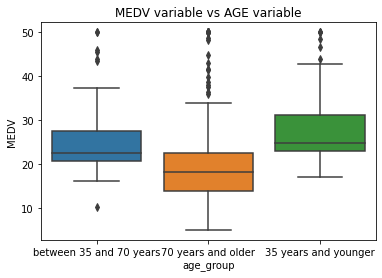

In [10]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
graph3 = sns.boxplot(x = 'age_group', y = 'MEDV', data = boston_df)
graph3.set_title('MEDV variable vs AGE variable')

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'The relationship between NOX and INDUS')

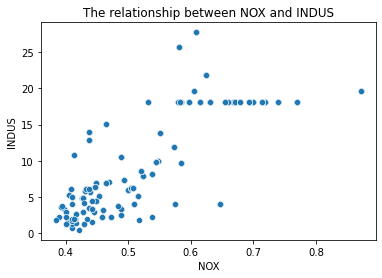

In [14]:
#NOX - nitro oxide con. 
#INDUS - non-retail business
graph4 = sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)
graph4.set_title('The relationship between NOX and INDUS')


From the pattern of the scatter plot above, when the INDUS variable tends to increase as the NOX variable increases. Therefore, the nitric oxide concentrations and the proportion of non-retail business acres per town has a positive correlation relation.

## Create a histogram for the pupil to teacher ratio variable

Text(0.5, 0.98, 'Histogram for the pupil-teacher ratio')

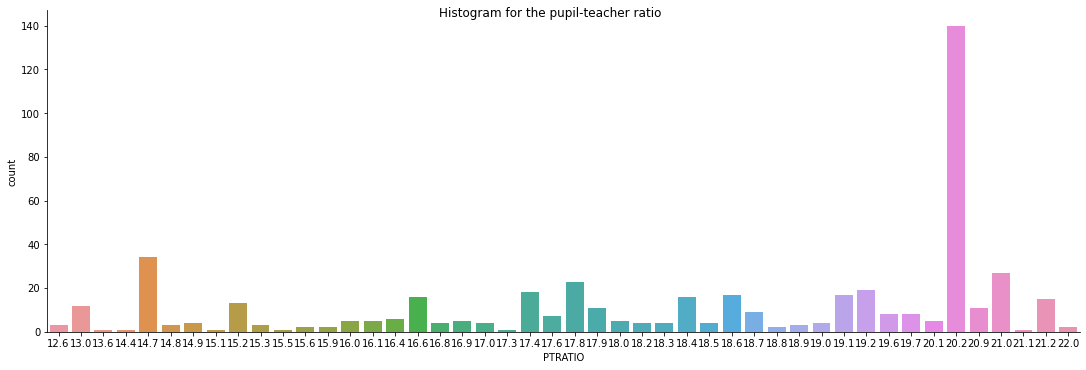

In [17]:
#PTRATIO - pupil-teacher ratio by town 
graph5 = sns.catplot(x = 'PTRATIO', kind = 'count', data = boston_df, aspect = 3)
graph5.fig.suptitle('Histogram for the pupil-teacher ratio')
#graph10 = sns.distplot(boston_df['PTRATIO'], kde = False)

# Task 5

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
α = 0.05


State the hypothesis:

    H_0: µ_1=µ_2 ("there is no difference in median value of houses bounded by the Charles river")
    𝐻_1:µ_1≠µ_2 ("there is a difference in median value of houses bounded by the Charles river")

In [4]:
#CHAS - Charles river  - 1=tract bounds river
#MEDV - median value of ower-occupied homes

#check for significance
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')



LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

The p-value of the levene test is less than the alpha value 0.05, we can not assume equality of variance

In [5]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

The P-value from the T test is 0.0036 which is less than the alpha value 0.05, we reject the null hypothesis as there is enoug proof that there is a statistical difference in median value of houses bounded by the Charles river or not. 

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
α = 0.05

State the hypothesis:
    
    H_0: µ_1=µ_2=µ_3 ("there is no difference in median value of houses for each proportion of owner occupied units built prior to 1940")
    𝐻_1:µ_1≠µ_2≠µ_3 ("there is a difference in median value of houses for each proportion of owner occupied units built prior to 1940")

In [9]:
#seperate the age group
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
forty_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
forty_fiftyseven = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
fiftyseven_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(forty_lower, forty_fiftyseven, fiftyseven_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


The p-value from the ANOVE test is 1.71*10^-15 which is less than the alpha value 0.05. Null hypothesis will be rejected as there is significant evidence that at least one of the age group means differ. 

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
α = 0.05

State the hypothesis:
    
    H_0: The nitric oxide concentration is not correlated to the proportion of non-retail business acres per town
    𝐻_1: The nitric oxide concentration is related to the proportion of non-retail business acres per town

In [13]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there exists a relationship between nitric oxide concentrations and proportion of non-retail business acres per town. 

## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
α = 0.05

State the hypothesis:
*   $H\_0: β1$ = 0 (Weighted distance to five Bostin employment centres has no effect on the median value of owner occupied homes)
*   $H\_1: β1$ is not equal to 0 (Weighted distance to five Bostin employment centres has effect on the median value of owner occupied homes)


In [14]:
X = boston_df['DIS']
X = sm.add_constant(X)
y = boston_df['MEDV']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 13 Dec 2021   Prob (F-statistic):           1.21e-08
Time:                        04:46:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The r value is around 0.249 which represents the additional weighted distance to the five Boston employment centres has a weak positive impact on the median value of owner occupied homes. Since the p-value is less than 0.05, there is evidence of correlation between beauty and evaluation scores. 